In [9]:
import torch
from torch import nn
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
class Perceptron(nn.Module):
    def __init__(self, input_size, hidden_neurons, output_size):
        super(Perceptron, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_neurons)
        self.output_layer = nn.Linear(hidden_neurons, output_size)
    
    @staticmethod
    def loss_function(y_pred, y_true):
        """binary crossentropy"""
        loss = -1 * (y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
        mean_loss = torch.mean(loss)
        return mean_loss

    def forward(self, x):
        hidden_output = torch.sigmoid(self.hidden_layer(x))
        y_pred = torch.sigmoid(torch.sigmoid(hidden_output))
        return y_pred

model = Perceptron(2, 1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [11]:
train_x = torch.tensor([[0, 0],[0, 1],[1, 0],[1, 1]]).type(torch.FloatTensor)
train_y_xor = torch.tensor([1, 0, 0, 1]).type(torch.FloatTensor)
train_y_and = torch.tensor([0, 1, 1, 0]).type(torch.FloatTensor)

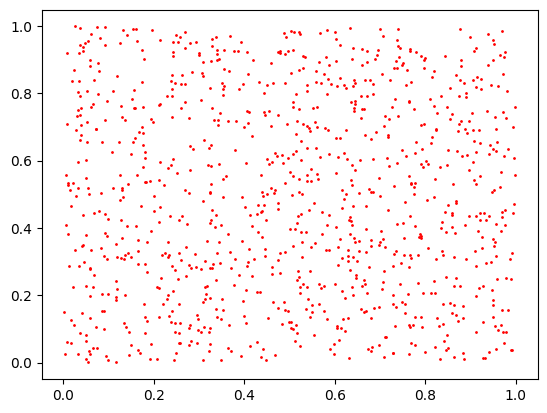

In [44]:
epochs = 500
cost = []
for epoch in range(epochs):
    total_loss = 0
    epoch = epoch + 1
    for x, y in zip(train_x, train_y_xor):
        yhat = model(x)
        loss = model.loss_function(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()
    cost.append(total_loss)


plot_x = torch.rand(1000)
plot_y = torch.rand(1000)

inputs = [*zip(plot_x.tolist(), plot_y.tolist())]
for x in inputs:
    y = model.forward(torch.tensor(x).type(torch.FloatTensor)).item()
    #print(y)
    if y > 0.5:
        plt.plot(x[0], x[1], 'o', color="red", markersize=1)
    else: 
        print("smt")
        plt.plot(x[0], x[1], 'o', color="green", markersize=1)
plt.show()